In [5]:
import numpy as np
from scipy.signal import correlate, correlate2d
import tensorflow as tf

In [6]:
def relu(x):
    return np.maximum(x, 0)

In [65]:
# from tensorflow.python.ops.gen_batch_ops import batch
# class CNN:
#     def __init__(self, n_kernel = 10, batch_size = 32, units = 10, lr = 0.1):
#         self.n_kernel = n_kernel        # 합성곱(컨벌루션)의 커널의 수
#         self.kernel_size = 3            # 커널 크기
#         self.optimizer = None           # 옵티마이저
#         self.c_w = None                   # 합성곱의 가중치(초기 가중치)
#         self.c_b = None                   # 합성곱의 절편(초기 바이어스(절편))
#         self.units = units              # 은닉층의 뉴런수
#         self.batch_size = batch_size    # 배치 크기
#         self.w1 = None                  # 입력층 -> 히든층으로 가는 가중치
#         self.b1 = None                  # 입력층 -> 히든층으로 가는 가중치
#         self.w2 = None                  # 히든층 -> 출력층으로 가는 가중치
#         self.b2 = None                  # 히든층 -> 출력층으로 가는 가중치
#         self.losses = []                # 훈련 손실
#         self.bal_losses = []            # 검증 손실
#         self.lr = lr                    # 학습률

#     def forpass(self, x):
#         # 입력 wx + b
#         # 합성곱 연산
#         c_out = tf.nn.conv2d(x, self.c_w, strides = 1, padding = 'SAME') + self.c_b
#         r_out = tf.nn.relu(c_out)
#         # 풀링 연산(2 x 2)
#         p_out = tf.nn.max_pool2d(r_out, 2, 2, padding = 'VALID')
#         # 벡터화
#         f_out = tf.reshape(p_out, [x.shape[0], -1])

#         # 은닉
#         z1 = tf.matmul(f_out, self.w1) + self.b1
#         a1 = tf.nn.relu(z1)

#         # 출력
#         z2 = tf.matmul(a1, self.w2) + self.b2
#         return z2

#     def init_w(self, input_shape, n_class):
#         g = tf.initializers.glorot_uniform()                                # 임의의 초깃값 생성 메소드
#         self.c_w = tf.Variable(g((3, 3, 1, self.n_kernel)))                 # 합성곱 가중치 초기화
#         self.c_b = tf.Variable(np.zeros(self.n_kernel), dtype = float)      # 합성곱 편향 초기화
#         n_f = input_shape[1]//2*input_shape[2]//2*self.n_kernel             # 벡터화를 통한 입력 뉴런수 도출
#         self.w1 = tf.Variable(g((n_f, self.units)))                           # L1 가중치 초기화(특성갯수, 은닉층 뉴런수)
#         self.b1 = tf.Variable(np.zeros(self.units), dtype = float)       # L1 편향 초기화(은닉층 뉴런수)
#         self.w2 = tf.Variable(g(self.units, n_class))                       # L2 가중치 초기화(은닉층 뉴런수, 클래스 갯수)
#         self.b2 = tf.Variable(np.zeros(n_class), dtype = float)             # L2 편향 초기화(클래스 갯수)

#     def fit(self, x, y, epochs = 100, val_x = None, val_y = None):
#         self.init_w(x.shape, y.shape[1])
#         self.optimizer = tf.optimizers.SGD(learning_rate = self.lr)
#         for i in range(epochs):
#             #print("에포크:", i + 1, end = ' ')
#             batch_losses = []
#             for x_b, y_b in self.gen_batch(x, y):
#                 self.training(x_b, y_b)
#                 batch_losses.append(self.get_loss(x_b, y_b))
#             tr_loss = np.mean(batch_losses)
#             val_loss = self.get_loss(val_x, val_y)
#             #print('tr_loss : ', tr_loss, end = ' ')
#             #print('val_loss : ', val_loss)
#             print(f"에포크 : {i + 1}, tr_loss : {tr_loss}, val_loss : {val_loss}")
#             self.losses.append(tr_loss)
#             self.val_losses.append(val_loss)

#     def gen_batch(self, x, y):
#         bins = len(x) // self.batch_size
#         idx = np.random.permutation(np.arange(len(x)))
#         x = x[idx]
#         y = y[idx]
#         for i in range(bins):
#             st = self.batch_size * i
#             end = self.batch_size * (i + 1)
#             yield x[st:end], y[st:end]

#     def training(self, x, y):
#         m = len(x)
#         with tf.GradientTape() as tape:
#             z = self.forpass(x)
#             loss = tf.nn.softmax_cross_entropy_with_logits(y, z)
#             loss = tf.reduce_mean(loss)
#         w_l = [self.c_w, self.c_b, self.w1, self.b1, self.w2, self.b2]
#         g = tape.gradient(loss, w_l)
#         self.optimizer.apply_gradients(zip(g, w_l))

#     def get_loss(self, x, y):
#         z = self.forpass(x)
#         loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, z))
#         return loss.numpy()

#     def predict(self, x):
#         z = self.forpass(x)
#         return np.argmax(z.numpy(), axis = 1)

#     def score(self, x, y):
#         return np.mean(self.predict(x) == np.argmax(y, axis = 1))


In [67]:
class CNN:
  def __init__(self,n_kernel=10,batch_size=32,units=10,lr=0.1):
    self.n_kernel=n_kernel      #합성곱(컨벌루션) 커널의수
    self.kernel_size=3          #커널 크기
    self.optimizer=None         #옵티마이저
    self.c_w=None               #합성곱의 가중치
    self.c_b=None               #합성곱의 절편
    self.units=units            #은닉층의 뉴런수
    self.batch_size=batch_size  #배치크기
    self.w1=None                #은닉층의 가중치
    self.b1=None                #은닉층의 절편
    self.w2=None                #출력층의 가중치
    self.b2=None                #출력층의 절편
    self.losses=[]              #훈련 손실
    self.val_losses=[]          #검증 손실
    self.lr=lr                  #학습률

  def forpass(self,x):
    #입력   wx+b
    #합성곱 연산
    c_out = tf.nn.conv2d(x,self.c_w,strides=1,padding="SAME")+self.c_b
    r_out = tf.nn.relu(c_out)
    #풀링 연산(2X2)
    p_out=tf.nn.max_pool2d(r_out,ksize=2,strides=2,padding='VALID')
    #백터화
    f_out=tf.reshape(p_out,[x.shape[0],-1])
    #은닉 wx+b
    z1 = tf.matmul(f_out,self.w1)+self.b1
    a1 = tf.nn.relu(z1)
    #출력
    z2 = tf.matmul(a1,self.w2)+self.b2
    return z2

  #def init_w(self,input_shape,output_shape):
  def init_w(self,input_shape,n_class):
    g = tf.initializers.glorot_uniform()                        #임의의 초깃값 생성 메소드
    self.c_w = tf.Variable(g((3,3,1,self.n_kernel)))            #합성곱 가중치 초기화()
    self.c_b = tf.Variable(np.zeros(self.n_kernel),dtype=float) #합성곱 편향 초기화
    n_f = input_shape[1]//2*input_shape[2]//2*self.n_kernel           #백터화를 통한 입력 뉴련수 도출
    #n_f = 14*14*self.n_kernel
    self.w1 = tf.Variable(g((n_f,self.units)))                    #l1 가중치 초기화(특성갯수, 은닉층 뉴런수)
    self.b1 = tf.Variable(np.zeros(self.units),dtype=float)  #l1 편향 초기화(은닉층 뉴런수)
    self.w2 = tf.Variable(g((self.units,n_class)))                #l2 가중치 초기화(은닉층 뉴런수, 클래스 갯수)
    self.b2 = tf.Variable(np.zeros(n_class),dtype=float)        #l2 편향 초기화(클래스 갯수)

  def fit(self,x,y,epochs=100,val_x=None,val_y=None):
    self.init_w(x.shape,y.shape[1])
    self.optimizer=tf.optimizers.SGD(learning_rate=self.lr)
    for i in range(epochs):
      #print("에포크:",i+1,end=' ')
      batch_losses=[]
      for x_b,y_b in self.gen_batch(x,y):
        self.training(x_b,y_b)
        batch_losses.append(self.get_loss(x_b,y_b))
      tr_loss = np.mean(batch_losses)
      val_loss = self.get_loss(val_x,val_y)
      #print('tr_loss:',tr_loss,end=',')
      #print('val_loss:',val_loss)
      print(f"에포크{i+1}:tr_loss:{tr_loss},val_loss:{val_loss}")
      self.losses.append(tr_loss)
      self.val_losses.append(val_loss)

  def gen_batch(self,x,y):
    bins = len(x)//self.batch_size
    idx = np.random.permutation(np.arange(len(x)))
    x=x[idx]
    y=y[idx]
    for i in range(bins):
      st = self.batch_size*i
      end = self.batch_size*(i+1)
      yield x[st:end],y[st:end]

  def training(self,x,y):
    m = len(x)
    with tf.GradientTape() as tape:
      z = self.forpass(x)
      loss = tf.nn.softmax_cross_entropy_with_logits(y,z)
      loss = tf.reduce_mean(loss)
    w_l=[self.c_w,self.c_b,self.w1,self.b1,self.w2,self.b2]
    g=tape.gradient(loss,w_l)
    self.optimizer.apply_gradients(zip(g,w_l))

  def get_loss(self,x,y):
    z = self.forpass(x)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y,z))
    return loss.numpy()

  def predict(self,x):
    z = self.forpass(x)
    return np.argmax(z.numpy(),axis=1)
  def score(self,x,y):
    return np.mean(self.predict(x)==np.argmax(y,axis=1))

In [11]:
x = tf.Variable(np.array([10., 20., 30., 40.]))
with tf.GradientTape() as tape:
    y = (x**3) + (2 * x) + 5
tape.gradient(y, x)

<tf.Tensor: shape=(4,), dtype=float64, numpy=array([ 302., 1202., 2702., 4802.])>

In [87]:
from keras.datasets import fashion_mnist
(x_data, y_data), (test_x, test_y) = fashion_mnist.load_data()

In [88]:
np.unique(y_data, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [89]:
np.unique(test_y, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [90]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(x_data, y_data, test_size = 0.2, stratify = y_data)

In [91]:
np.unique(train_y, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800]))

In [92]:
np.unique(val_y, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200]))

In [93]:
train_x.shape, test_x.shape, val_x.shape, train_y.shape, test_y.shape, val_y.shape

((48000, 28, 28),
 (10000, 28, 28),
 (12000, 28, 28),
 (48000,),
 (10000,),
 (12000,))

In [94]:
tr_train_x = train_x.reshape(-1, 28, 28, 1)
tr_test_x = test_x.reshape(-1, 28, 28, 1)
tr_val_x = val_x.reshape(-1, 28, 28, 1)

In [95]:
s_train_x = tr_train_x / 255
s_test_x = tr_test_x / 255
s_val_x = tr_val_x / 255

In [96]:
from keras.utils import to_categorical, to_ordinal
s_train_y = to_categorical(train_y)
s_test_y = to_categorical(test_y)
s_val_y = to_categorical(val_y)

In [69]:
m = CNN(n_kernel = 10, batch_size = 128, units = 100, lr = 0.01)
m.fit(s_train_x, s_train_y, 10, s_val_x, s_val_y)

에포크1:tr_loss:1.20236074924469,val_loss:0.706718921661377
에포크2:tr_loss:0.5877407789230347,val_loss:0.5807648301124573
에포크3:tr_loss:0.5120782256126404,val_loss:0.5372806191444397
에포크4:tr_loss:0.47429049015045166,val_loss:0.5021255612373352
에포크5:tr_loss:0.44734278321266174,val_loss:0.4891071021556854
에포크6:tr_loss:0.42702358961105347,val_loss:0.46843114495277405
에포크7:tr_loss:0.4119788408279419,val_loss:0.4499201774597168
에포크8:tr_loss:0.39760103821754456,val_loss:0.4334164261817932
에포크9:tr_loss:0.3861369490623474,val_loss:0.41954687237739563
에포크10:tr_loss:0.37745219469070435,val_loss:0.463052898645401


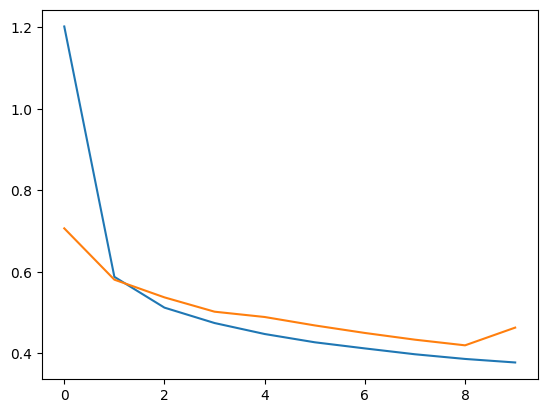

In [70]:
import matplotlib.pyplot as plt
plt.plot(m.losses)
plt.plot(m.val_losses)

In [71]:
m.score(s_train_x, s_train_y), m.score(s_test_x, s_test_y), m.score(s_val_x, s_val_y)

(0.8383541666666666, 0.8271, 0.8331666666666667)

In [105]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.losses import categorical_crossentropy

#Dropout 미포함

In [107]:
m = Sequential()
m.add(Conv2D(10, 3, activation = 'relu', padding = "same", input_shape = s_train_x.shape[1:]))
m.add(MaxPooling2D((2)))
m.add(Flatten())
m.add(Dense(100, activation = 'relu'))
m.add(Dense(10, activation = 'softmax'))
m.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1960)              0         
                                                                 
 dropout (Dropout)           (None, 1960)              0         
                                                                 
 dense_10 (Dense)            (None, 100)               196100    
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                      

In [103]:
m.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = 'acc')

In [104]:
hy = m.fit(s_train_x, s_train_y, validation_data = (s_val_x, s_val_y), batch_size = 128, epochs = 10)

Epoch 1/10
375/375 [==============================] - 22s 52ms/step - loss: 1.0212 - acc: 0.6740 - val_loss: 0.6567 - val_acc: 0.7767
Epoch 2/10
375/375 [==============================] - 22s 59ms/step - loss: 0.6089 - acc: 0.7876 - val_loss: 0.5575 - val_acc: 0.8008
Epoch 3/10
375/375 [==============================] - 19s 51ms/step - loss: 0.5463 - acc: 0.8066 - val_loss: 0.5069 - val_acc: 0.8260
Epoch 4/10
375/375 [==============================] - 20s 52ms/step - loss: 0.5105 - acc: 0.8185 - val_loss: 0.5087 - val_acc: 0.8210
Epoch 5/10
375/375 [==============================] - 18s 49ms/step - loss: 0.4890 - acc: 0.8265 - val_loss: 0.5123 - val_acc: 0.8143
Epoch 6/10
375/375 [==============================] - 25s 67ms/step - loss: 0.4691 - acc: 0.8345 - val_loss: 0.4837 - val_acc: 0.8279
Epoch 7/10
375/375 [==============================] - 19s 51ms/step - loss: 0.4544 - acc: 0.8398 - val_loss: 0.4754 - val_acc: 0.8334
Epoch 8/10
375/375 [==============================] - 19s 49ms

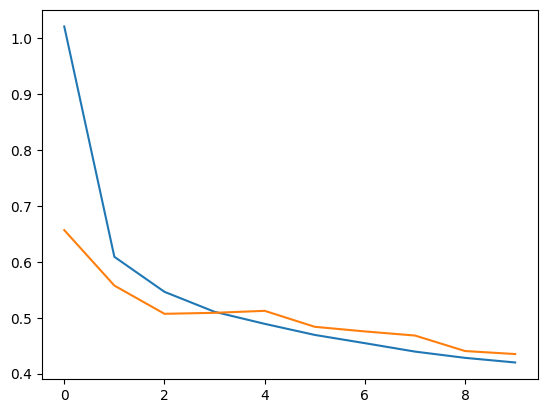

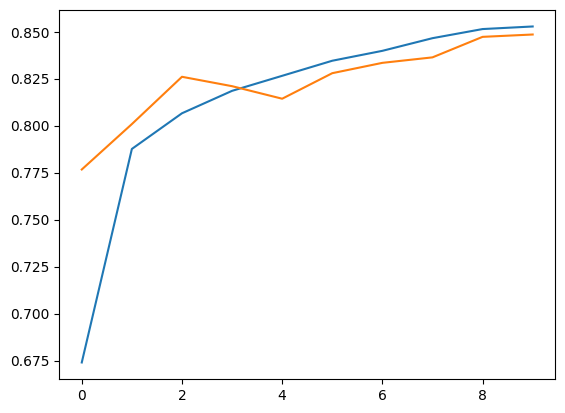

In [110]:
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])
plt.show()
plt.plot(hy.history['acc'])
plt.plot(hy.history['val_acc'])
plt.show()

# Dropout 포함

In [111]:
m = Sequential()
# 컨벌루션 레이어
m.add(Conv2D(10, 3, activation = 'relu', padding = "same", input_shape = s_train_x.shape[1:]))
# 풀링 레이어
m.add(MaxPooling2D((2)))

# 벡터화
m.add(Flatten())

# 중간에 레이어 몇개를 끊어버림 (그물망 연상)
m.add(Dropout(0.5))

# 은닉층
m.add(Dense(100, activation = 'relu'))

# 출력층
m.add(Dense(10, activation = 'softmax'))
m.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1960)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1960)              0         
                                                                 
 dense_12 (Dense)            (None, 100)               196100    
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                      

In [112]:
m.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = 'acc')

In [113]:
hy = m.fit(s_train_x, s_train_y, validation_data = (s_val_x, s_val_y), batch_size = 128, epochs = 10)

Epoch 1/10
375/375 [==============================] - 26s 68ms/step - loss: 1.4328 - acc: 0.4852 - val_loss: 0.7825 - val_acc: 0.7088
Epoch 2/10
375/375 [==============================] - 24s 63ms/step - loss: 0.8069 - acc: 0.7037 - val_loss: 0.6382 - val_acc: 0.7790
Epoch 3/10
375/375 [==============================] - 21s 56ms/step - loss: 0.7006 - acc: 0.7451 - val_loss: 0.5892 - val_acc: 0.7924
Epoch 4/10
375/375 [==============================] - 20s 54ms/step - loss: 0.6504 - acc: 0.7616 - val_loss: 0.5479 - val_acc: 0.8023
Epoch 5/10
375/375 [==============================] - 20s 53ms/step - loss: 0.6199 - acc: 0.7751 - val_loss: 0.5286 - val_acc: 0.8132
Epoch 6/10
375/375 [==============================] - 20s 54ms/step - loss: 0.5911 - acc: 0.7846 - val_loss: 0.5113 - val_acc: 0.8189
Epoch 7/10
375/375 [==============================] - 20s 54ms/step - loss: 0.5747 - acc: 0.7925 - val_loss: 0.4944 - val_acc: 0.8307
Epoch 8/10
375/375 [==============================] - 21s 57ms

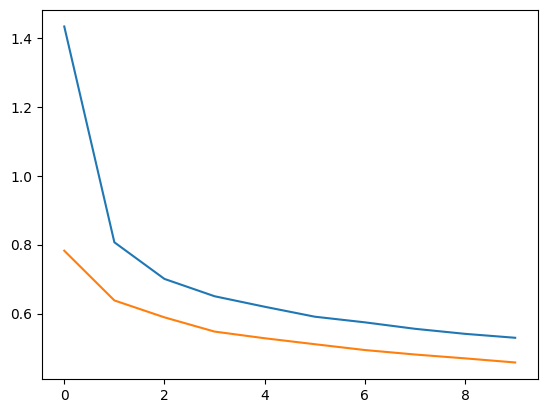

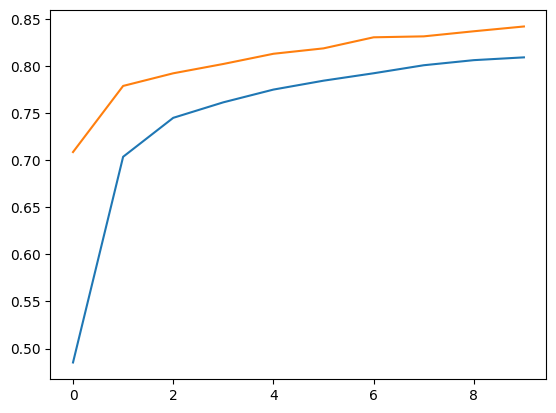

In [114]:
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])
plt.show()
plt.plot(hy.history['acc'])
plt.plot(hy.history['val_acc'])
plt.show()

# mnist 데이터

In [115]:
from keras.datasets import mnist
(x, y), (test_x, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [116]:
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size = 0.2, stratify = y)

In [117]:
tr_train_x = train_x.reshape(-1, 28, 28, 1)
tr_test_x = test_x.reshape(-1, 28, 28, 1)
tr_val_x = val_x.reshape(-1, 28, 28, 1)

In [118]:
s_train_x = tr_train_x / 255
s_test_x = tr_test_x / 255
s_val_x = tr_val_x / 255

In [119]:
s_train_y = to_categorical(train_y)
s_test_y = to_categorical(test_y)
s_val_y = to_categorical(val_y)

In [120]:
train_x.shape, test_x.shape, val_x.shape, train_y.shape, test_y.shape, val_y.shape

((48000, 28, 28),
 (10000, 28, 28),
 (12000, 28, 28),
 (48000,),
 (10000,),
 (12000,))

In [121]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [123]:
ck_p = ModelCheckpoint("cnn_best_m.h5", save_best_only = True)
es = EarlyStopping(patience = 3, restore_best_weights = True)

In [ ]:
m = Sequential()
m.add(Conv2D(32, 3, activation = 'relu', padding = "same", input_shape = s_train_x.shape[1:]))
m.add(Flatten())
m.add(Dense(10, activation = 'softmax'))
m.compile(loss = 'categorical_crossentropy', metrics = 'acc')
hy = m.fit(s_train_x, s_train_y, validation_data = (s_val_x, s_val_y), callbacks = [ck_p, es], batch_size = 128, epochs = 100)
